In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [299]:
load_error = pd.read_csv("../src/data/load_errors_date.csv", parse_dates = ["date"]).drop("Unnamed: 0", axis = 1)
pv_error = pd.read_csv("../src/data/pv_errors_date.csv", parse_dates = ["date"]).drop("Unnamed: 0", axis = 1)
load_error.head(2)

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,date,rmse
0,-0.700000,-2.64375,-3.2250,-7.85,-0.859375,6.2625,10.91875,3.75,10.096875,11.5000,...,42.015625,36.7875,18.03125,22.3125,12.675000,19.76875,-31.790625,-24.0000,2021-04-08 00:00:00,39.105831
1,-1.990625,-2.55000,-7.2375,-0.10,7.000000,11.5875,4.31875,10.75,11.362500,-9.1875,...,39.412500,21.0000,25.28125,15.4500,22.565625,-28.30625,-20.521875,-12.9375,2021-04-08 00:10:00,40.907865


In [305]:
N= 60
def remove_outliers(df, N, pl= 5, pu=95):
    steps = [str(i) for i in range(N)]
    print("Shape before", df.shape)
    upper = np.percentile(df[str(N-1)], pu)
    lower = np.percentile(df[str(N-1)], pl)
    for step in steps:
        df = df[(df[step] < upper) & (df[step] > lower)]
    print("Shape after", df.shape)
    return df


load_error = remove_outliers(load_error, N)

Shape before (2175, 62)
Shape after (1207, 62)


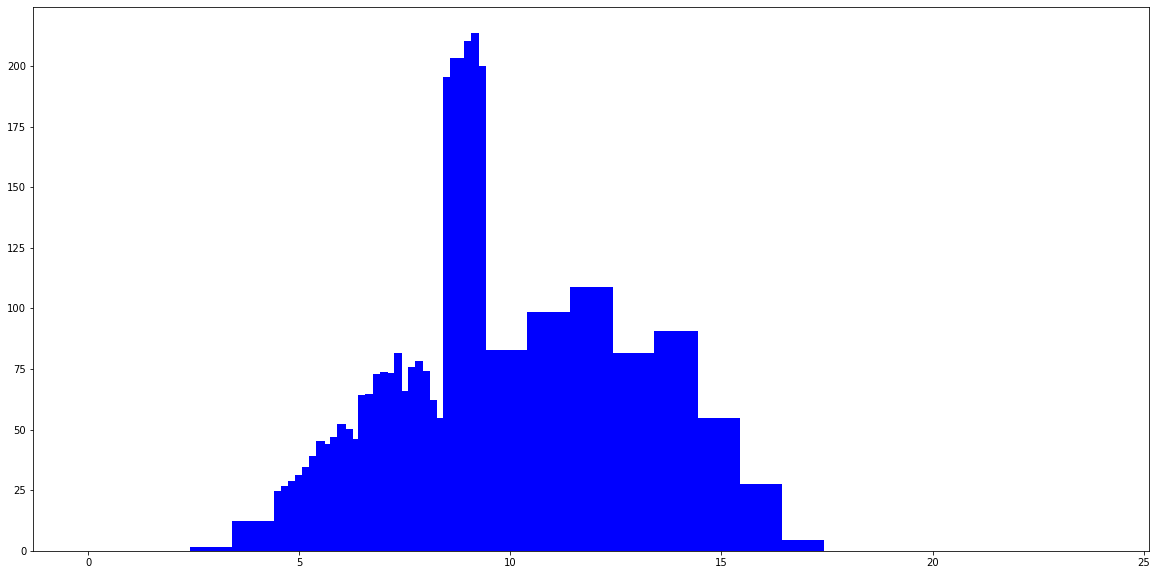

In [306]:
import time
plt.figure(figsize = ( 20,10))


for (hour, minute), errors in pv_error.groupby([pv_error.date.dt.hour, pv_error.date.dt.minute]):
    #print("Average errors at {}:{}".format(hour, minute))
    #plt.figure(figsize = (20,5))
    #plt.plot(np.mean(errors.filter(steps), axis = 0))
    #plt.show()

    rmse = (np.std(errors["10"]))
    plt.bar(hour + minute/60, rmse,  width = 0.20, color = "blue", alpha= 1)

plt.show()

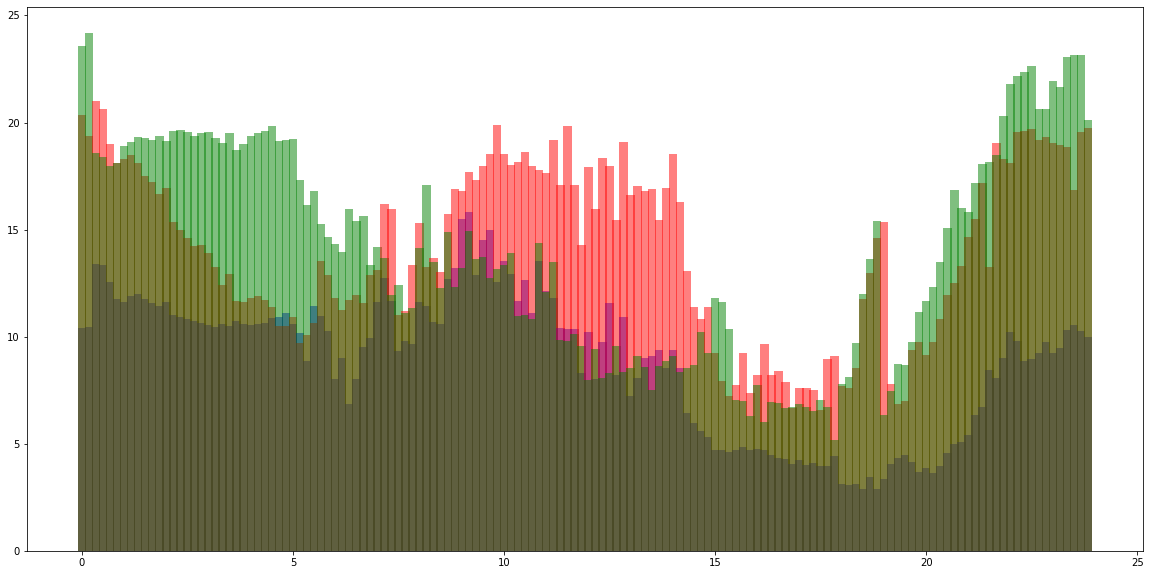

,i,type,prob,0,1,2,3,4,5,6,...,50,51,52,53,54,55,56,57,58,59
0,0.0,0.0,0.374491,-1.406250,-8.00625,-10.181250,-9.962500,-3.906250,-0.843750,-2.053125,...,-39.646875,-41.412500,-48.975000,-33.431250,-49.953125,-26.287500,-35.540625,-45.606250,-62.440625,-47.4375
1,0.0,1.0,0.434276,3.328125,-1.09375,1.293750,4.112500,7.062500,4.106250,2.515625,...,60.703125,58.175000,49.815625,59.718750,49.546875,61.212500,51.159375,42.125000,9.687500,6.3750
2,0.0,2.0,0.191233,1.664583,-3.88750,-3.425000,-1.479167,2.510417,1.862500,0.571875,...,18.709375,13.604167,1.292708,-1.156250,-2.875000,3.391667,0.440625,-15.402083,-20.639583,-17.5625
3,1.0,0.0,0.358425,-6.559375,-8.83750,-8.484375,-2.550000,-3.593750,-5.118750,-6.178125,...,-40.387500,-47.950000,-32.515625,-48.731250,-25.562500,-34.600000,-44.615625,-61.268750,-46.178125,-17.4375
4,1.0,1.0,0.447770,-4.334375,-1.65625,0.862500,3.812500,3.593750,2.531250,2.243750,...,60.468750,52.087500,61.987500,51.900000,63.640625,53.500000,44.934375,12.518750,9.253125,15.5625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,142.0,1.0,0.437299,3.362500,4.85625,8.025000,2.925000,5.968750,9.750000,10.300000,...,23.371875,44.812500,55.093750,52.350000,44.187500,54.250000,44.906250,55.731250,46.006250,36.1875
428,142.0,2.0,0.194055,-1.737500,-0.08750,2.196094,-3.246875,-2.089844,0.295313,3.546094,...,-0.630469,18.621875,21.182031,10.739063,7.691406,7.400000,6.635156,4.464062,-1.428906,-15.7500
429,143.0,0.0,0.396415,-6.221875,-3.02500,-8.503125,-9.725000,-9.671875,-3.525000,-6.481250,...,-44.268750,-40.275000,-42.168750,-49.762500,-34.140625,-50.912500,-26.868750,-36.368750,-46.515625,-63.5625
430,143.0,1.0,0.403229,8.725000,11.98125,7.378125,6.987500,12.406250,15.262500,12.084375,...,46.725000,57.237500,54.681250,46.500000,56.562500,46.462500,58.209375,48.400000,39.053125,6.7500


In [317]:

def create_scenario_df(N, all_errors):
    c = ["i", "type", "prob"]
    steps = [str(i) for i in range(N)]
    df = pd.DataFrame(columns = c + steps)
    i = 0
    step = 0
    plt.figure(figsize = (20,10))
    for (hour, minute), errors in all_errors.groupby([all_errors.date.dt.hour, all_errors.date.dt.minute]):
        step_errors = errors.filter(steps)
        _mean = np.mean(step_errors, axis = 0)
        _min = np.min(step_errors, axis = 0)
        _max = np.max(step_errors, axis = 0)
        stds = np.array([np.std(_min), np.std(_max), np.std(_mean)]).sum()
        df.loc[i] = _min
        df.loc[i]["i"] = step
        df.loc[i]["type"] = 0
        df.loc[i]["prob"] = np.std(_min)/stds
        i += 1
        df.loc[i] = _max
        df.loc[i]["i"] = step
        df.loc[i]["type"] = 1
        df.loc[i]["prob"] = np.std(_max)/stds
        i += 1
        df.loc[i] = _mean
        df.loc[i]["i"] = step
        df.loc[i]["type"] = 2
        df.loc[i]["prob"] = np.std(_mean)/stds
        i += 1
        step += 1

        """
        plt.figure(figsize = (20,3))c
        plt.plot(np.mean(step_errors, axis = 0), color = "green")
        plt.plot(l_min,color = "blue")
        plt.plot(l_max, color = "red")
        plt.show()
        time.sleep(0.6)
        """


        plt.bar(hour + minute/60, np.std(_mean), width = 0.20, color = "blue", alpha= 0.5)
        plt.bar(hour + minute/60, np.std(_min), width = 0.20, color = "red", alpha=0.5)
        plt.bar(hour + minute/60, np.std(_max), width = 0.20, color = "green", alpha= 0.5)
    return df.reset_index(drop=True)


load_df = create_scenario_df(N, load_error)
plt.show() 
load_df

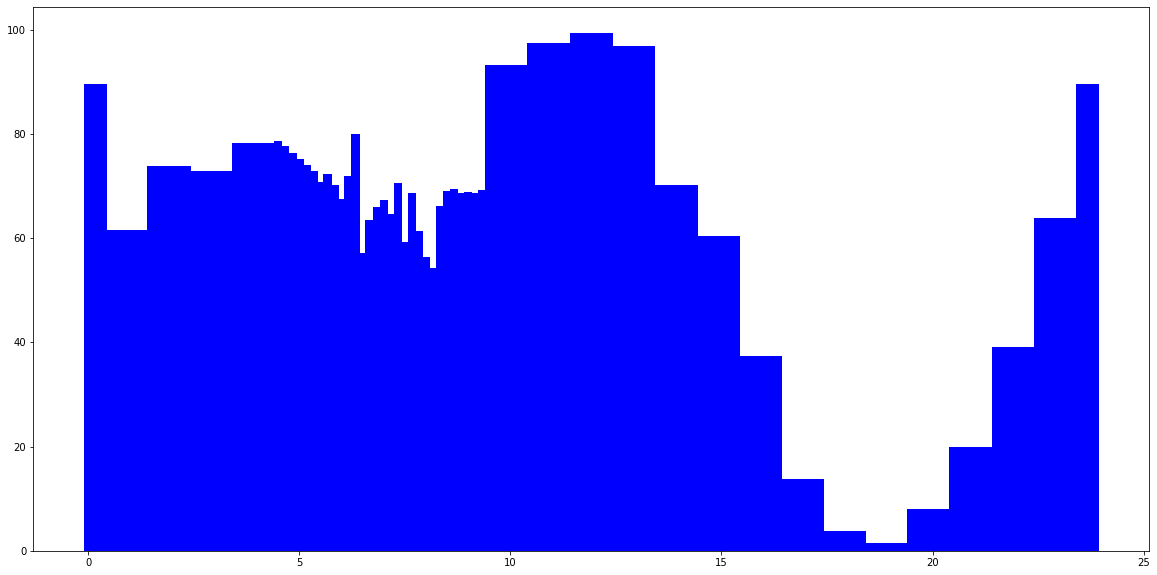

,i,type,prob,0,1,2,3,4,5,6,...,50,51,52,53,54,55,56,57,58,59
0,0.0,0.0,0.405883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-135.434639,-121.941599,-158.633231,-137.272326,-126.781722,-147.060716,-151.035654,-136.807840,-179.757202,-287.420918
1,0.0,1.0,0.540431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,181.661525,225.130204,211.159590,221.285522,221.657241,252.086958,252.820831,263.307128,266.893298,283.395908
2,0.0,2.0,0.053686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.511644,39.862534,9.198772,15.434177,19.612864,-2.127431,7.280499,4.440813,-7.435522,-12.757792
3,1.0,0.0,0.405883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-135.434639,-121.941599,-158.633231,-137.272326,-126.781722,-147.060716,-151.035654,-136.807840,-179.757202,-287.420918
4,1.0,1.0,0.540431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,181.661525,225.130204,211.159590,221.285522,221.657241,252.086958,252.820831,263.307128,266.893298,283.395908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,142.0,1.0,0.540009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,181.661525,225.130204,211.159590,221.285522,221.657241,252.086958,252.820831,263.307128,266.893298,283.395908
428,142.0,2.0,0.054296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.891965,36.335327,4.209980,12.172470,16.777440,-4.587081,5.689395,1.968996,-12.431297,-21.131683
429,143.0,0.0,0.405695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-135.434639,-121.941599,-158.633231,-137.272326,-126.781722,-147.060716,-151.035654,-136.807840,-179.757202,-287.420918
430,143.0,1.0,0.540009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,181.661525,225.130204,211.159590,221.285522,221.657241,252.086958,252.820831,263.307128,266.893298,283.395908


In [312]:
pv_df = create_scenario_df(N, pv_error)
plt.show()
pv_df

In [315]:
load_df.to_csv("../src/data/load_scenarios.csv")
pv_df.to_csv("../src/data/pv_scenarios.csv")